1. Introduction

# Model Development for NetTrafficGuard

In this notebook, we will develop machine learning models to analyze and enhance network traffic security. We'll use three processed datasets for our analysis:
1. **CICIDS2017_processed.csv**
2. **KDDCup1999_processed.csv**
3. **NSL-KDD_processed.csv**

The primary steps include:
- Loading and merging the datasets
- Feature engineering
- Splitting the data into training and test sets
- Building and evaluating various machine learning models


2. Load and Prepare Data


In [1]:
import pandas as pd

# Load datasets
cicids2017_df = pd.read_csv('E:\\Hackatone Project\\NetTrafficGuard\\data\\processed\\processedCICIDS2017_processed.csv')
kddcup1999_df = pd.read_csv('E:\\Hackatone Project\\NetTrafficGuard\\data\\processed\\KDDCup1999_processed.csv')
nsl_kdd_df = pd.read_csv('E:\\Hackatone Project\\NetTrafficGuard\\data\\processed\\NSL-KDD_processed.csv')

# Display basic information
print("CICIDS2017 DataFrame:")
print(cicids2017_df.info())
print(cicids2017_df.head())

print("\nKDDCup1999 DataFrame:")
print(kddcup1999_df.info())
print(kddcup1999_df.head())

print("\nNSL-KDD DataFrame:")
print(nsl_kdd_df.info())
print(nsl_kdd_df.head())


CICIDS2017 DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119612 entries, 0 to 119611
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     119612 non-null  object 
 1   Src IP                      119612 non-null  object 
 2   Src Port                    119612 non-null  float64
 3   Dst IP                      119612 non-null  object 
 4   Dst Port                    119612 non-null  float64
 5   Protocol                    119612 non-null  float64
 6   Timestamp                   119612 non-null  object 
 7   Flow Duration               119612 non-null  float64
 8   Total Fwd Packet            119612 non-null  float64
 9   Total Bwd packets           119612 non-null  float64
 10  Total Length of Fwd Packet  119612 non-null  float64
 11  Total Length of Bwd Packet  119612 non-null  float64
 12  Fwd Packet Length Max       119612 non-null  float

### **Data Inspection and Preprocessing**

We will inspect the loaded data to understand its structure, and then preprocess it to ensure consistency across the datasets.


3. Data Inspection and Cleaning


In [2]:
# Check for missing values
print("Missing values in CICIDS2017:")
print(cicids2017_df.isnull().sum())

print("\nMissing values in KDDCup1999:")
print(kddcup1999_df.isnull().sum())

print("\nMissing values in NSL-KDD:")
print(nsl_kdd_df.isnull().sum())

# Drop columns with excessive missing values or irrelevance
cicids2017_df.dropna(axis=1, thresh=0.9*len(cicids2017_df), inplace=True)
kddcup1999_df.dropna(axis=1, thresh=0.9*len(kddcup1999_df), inplace=True)
nsl_kdd_df.dropna(axis=1, thresh=0.9*len(nsl_kdd_df), inplace=True)

# Drop duplicates
cicids2017_df.drop_duplicates(inplace=True)
kddcup1999_df.drop_duplicates(inplace=True)
nsl_kdd_df.drop_duplicates(inplace=True)

# Example of further cleaning: standardizing column names
cicids2017_df.columns = cicids2017_df.columns.str.lower().str.replace(' ', '_')
kddcup1999_df.columns = kddcup1999_df.columns.str.lower().str.replace(' ', '_')
nsl_kdd_df.columns = nsl_kdd_df.columns.str.lower().str.replace(' ', '_')

print("\nCleaned CICIDS2017 DataFrame:")
print(cicids2017_df.head(3))
print("\nCleaned KDDCup1999 DataFrame:")
print(kddcup1999_df.head(3))
print("\nCleaned NSL-KDD DataFrame:")
print(nsl_kdd_df.head(3))


Missing values in CICIDS2017:
Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
           ..
Idle Std    0
Idle Max    0
Idle Min    0
Label       0
Label.1     0
Length: 85, dtype: int64

Missing values in KDDCup1999:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64

Missing values in NSL-KDD:
0          0
tcp        0
private    0
rej        0
0.1        0
0.2        0
0.3        0
0.4        0
0.5        0
0.6        0
0.7        0
0.8        0
0.9        0
0.10       0
0.11       0
0.12       0
0.13       0
0.14       0
0.15       0
0.16       0
0.17       0
0.18       0
229        0
10         0
0.19       0
0.20       0
1          0
1.1        0
0.04       0
0.06  

# 4. Feature Engineering


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical features
def encode_categorical(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders

cicids2017_df, cicids2017_encoders = encode_categorical(cicids2017_df)
kddcup1999_df, kddcup1999_encoders = encode_categorical(kddcup1999_df)
nsl_kdd_df, nsl_kdd_encoders = encode_categorical(nsl_kdd_df)

# Feature scaling
scaler = StandardScaler()
cicids2017_scaled = pd.DataFrame(scaler.fit_transform(cicids2017_df), columns=cicids2017_df.columns)
kddcup1999_scaled = pd.DataFrame(scaler.fit_transform(kddcup1999_df), columns=kddcup1999_df.columns)
nsl_kdd_scaled = pd.DataFrame(scaler.fit_transform(nsl_kdd_df), columns=nsl_kdd_df.columns)

print("Scaled CICIDS2017 DataFrame:")
print(cicids2017_scaled.head(2))
print("\nScaled KDDCup1999 DataFrame:")
print(kddcup1999_scaled.head(2))
print("\nScaled NSL-KDD DataFrame:")
print(nsl_kdd_scaled.head(2))


Scaled CICIDS2017 DataFrame:
    flow_id    src_ip  src_port    dst_ip  dst_port  protocol  timestamp  \
0 -0.686773 -0.417225  0.966619  0.452353  -0.66708 -0.865321   0.769594   
1 -0.686728 -0.417225  0.966671  0.452353  -0.66708 -0.865321   0.769594   

   flow_duration  total_fwd_packet  total_bwd_packets  ...  active_mean  \
0      -0.533407         -0.162008          -0.154376  ...          0.0   
1      -0.533402         -0.162008          -0.154376  ...          0.0   

   active_std  active_max  active_min  idle_mean  idle_std  idle_max  \
0         0.0         0.0         0.0  -0.939152 -0.277822  -0.95157   
1         0.0         0.0         0.0  -0.939152 -0.277822  -0.95157   

   idle_min     label   label.1  
0 -0.793988 -0.687776 -1.507472  
1 -0.793988 -0.687776 -1.507472  

[2 rows x 85 columns]

Scaled KDDCup1999 DataFrame:
     0         1         2    3         4    5    6    7    8    9  ...  \
0  0.0 -0.535962 -0.588439  0.0  1.021557  0.0  0.0  0.0  0.0  0.0  .

### **Data Merging**

To create a comprehensive model, we'll combine the datasets into a single DataFrame. This process involves concatenating the data and ensuring consistency in features.


In [4]:
# Add a column to identify the source dataset
cicids2017_scaled['source'] = 'CICIDS2017'
kddcup1999_scaled['source'] = 'KDDCup1999'
nsl_kdd_scaled['source'] = 'NSL-KDD'

# Concatenate data
merged_df = pd.concat([cicids2017_scaled, kddcup1999_scaled, nsl_kdd_scaled], ignore_index=True)

print("Merged DataFrame:")
print(merged_df.head())
print(merged_df.info())


Merged DataFrame:
    flow_id    src_ip  src_port    dst_ip  dst_port  protocol  timestamp  \
0 -0.686773 -0.417225  0.966619  0.452353 -0.667080 -0.865321   0.769594   
1 -0.686728 -0.417225  0.966671  0.452353 -0.667080 -0.865321   0.769594   
2 -0.686683 -0.417225  0.966722  0.452353 -0.667080 -0.865321   0.769594   
3 -0.325367 -0.417225  0.554961  1.551699 -0.667080 -0.865321   0.769594   
4 -0.999105 -0.417225 -0.185706 -0.353687  0.238927 -0.865321   0.769388   

   flow_duration  total_fwd_packet  total_bwd_packets  ...  10.1  0.04.1  \
0      -0.533407         -0.162008          -0.154376  ...   NaN     NaN   
1      -0.533402         -0.162008          -0.154376  ...   NaN     NaN   
2      -0.533402         -0.162008          -0.154376  ...   NaN     NaN   
3      -0.533404         -0.162008          -0.154376  ...   NaN     NaN   
4      -0.249732          1.868664           1.175566  ...   NaN     NaN   

   0.06.1  0.22  0.23  0.24  0.25  1.2  1.3  neptune  
0     NaN   N

### **Model Building and Evaluation**

We will split the data into training and test sets, build several machine learning models, and evaluate their performance. This includes:
- Splitting the data
- Training and evaluating models
- Comparing model performance


# **6. Model Building and Evaluation**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load datasets
cicids2017_df = pd.read_csv('E:\\Hackatone Project\\NetTrafficGuard\\data\\processed\\processedCICIDS2017_processed.csv')
kddcup1999_df = pd.read_csv('E:\\Hackatone Project\\NetTrafficGuard\\data\\processed\\KDDCup1999_processed.csv')
nsl_kdd_df = pd.read_csv('E:\\Hackatone Project\\NetTrafficGuard\\data\\processed\\NSL-KDD_processed.csv')

# Check column names for each dataset
print("CICIDS2017 Columns:")
print(cicids2017_df.columns)
print("\nKDDCup1999 Columns:")
print(kddcup1999_df.columns)
print("\nNSL-KDD Columns:")
print(nsl_kdd_df.columns)

# Rename target columns for consistency
cicids2017_df['target'] = cicids2017_df['Label']  # Assuming 'Label' is the actual target column
kddcup1999_df['target'] = kddcup1999_df['41']     # Assuming '41' is the actual target column
nsl_kdd_df['target'] = nsl_kdd_df['21']           # Assuming '21' is the actual target column

# Drop unnecessary or duplicate columns
cicids2017_df.drop(['Label', 'Label.1'], axis=1, inplace=True)  # Drop original target columns
kddcup1999_df.drop(['41'], axis=1, inplace=True)               # Drop original target column
nsl_kdd_df.drop(['21'], axis=1, inplace=True)                  # Drop original target column

# Add a column to identify the source dataset
cicids2017_df['source'] = 'CICIDS2017'
kddcup1999_df['source'] = 'KDDCup1999'
nsl_kdd_df['source'] = 'NSL-KDD'

# Concatenate data
merged_df = pd.concat([cicids2017_df, kddcup1999_df, nsl_kdd_df], ignore_index=True)

# Drop columns with excessive missing values or irrelevance
merged_df.dropna(axis=1, thresh=0.9*len(merged_df), inplace=True)
merged_df.drop_duplicates(inplace=True)

# Ensure target column is categorical
merged_df['target'] = merged_df['target'].astype('category').cat.codes

# Split data into features and target
X = merged_df.drop('target', axis=1)
y = merged_df['target']

# Convert categorical columns to numerical
X = pd.get_dummies(X)

# Ensure all feature columns are numeric
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert to numeric, force errors to NaN

# Fill any remaining NaN values with a placeholder or remove
X.fillna(0, inplace=True)  # or use X.dropna(inplace=True) if you prefer

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel for simplicity
lr_model = LogisticRegression(max_iter=1000, random_state=42)  # Increased max_iter for convergence

# Train models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Predict and evaluate
rf_predictions = rf_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Print classification reports and accuracy scores
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Accuracy Score:", accuracy_score(y_test, rf_predictions))

print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Accuracy Score:", accuracy_score(y_test, svm_predictions))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, lr_predictions))


CICIDS2017 Columns:
Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Leng

c:\Users\Rahul\.conda\envs\nettrafficguard\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rahul\.conda\envs\nettrafficguard\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rahul\.conda\envs\nettrafficguard\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

In [6]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [7]:
from sklearn.metrics import confusion_matrix, classification_report
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0
          20       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00

c:\Users\Rahul\.conda\envs\nettrafficguard\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rahul\.conda\envs\nettrafficguard\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rahul\.conda\envs\nettrafficguard\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

# 9. Hyperparameter Tuning
Hyperparameter tuning can significantly improve the performance of your model. Use techniques such as Grid Search or Random Search to find the best parameters for your model.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

# Ensure y_train is defined and check the number of unique classes
if 'y_train' not in globals():
    raise ValueError("y_train is not defined. Ensure the target variable is properly set.")

# Check the number of unique classes
num_classes = len(np.unique(y_train))
print(f"Number of unique classes in y_train: {num_classes}")

# Define a cross-validation strategy, ensuring n_splits does not exceed the number of unique classes
cv_strategy = StratifiedKFold(n_splits=min(3, num_classes))

# Define the model
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
try:
    grid_search.fit(X_train, y_train)
    # Print the best parameters and best score
    print("Best Parameters:")
    print(grid_search.best_params_)
    print("\nBest Score:")
    print(grid_search.best_score_)
except Exception as e:
    print(f"An error occurred: {e}")


Number of unique classes in y_train: 21
Fitting 3 folds for each of 108 candidates, totalling 324 fits
An error occurred: n_splits=3 cannot be greater than the number of members in each class.


# 10 . Feature Importance Analysis and Model Validation
Use additional validation techniques to ensure your model generalizes well. This can include cross-validation and performance on unseen datasets.
Analyzing feature importance helps in understanding which features contribute most to the model’s predictions. This can guide further feature engineering and selection.

Class distribution:
target
22    1
3     1
12    1
14    1
11    1
27    1
13    1
4     1
19    1
2     1
25    1
29    1
10    1
24    1
23    1
8     1
7     1
18    1
26    1
17    1
28    1
Name: count, dtype: int64
Using 2 splits for cross-validation.
Fitting 21 folds for each of 108 candidates, totalling 2268 fits
Best Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Score:
0.0


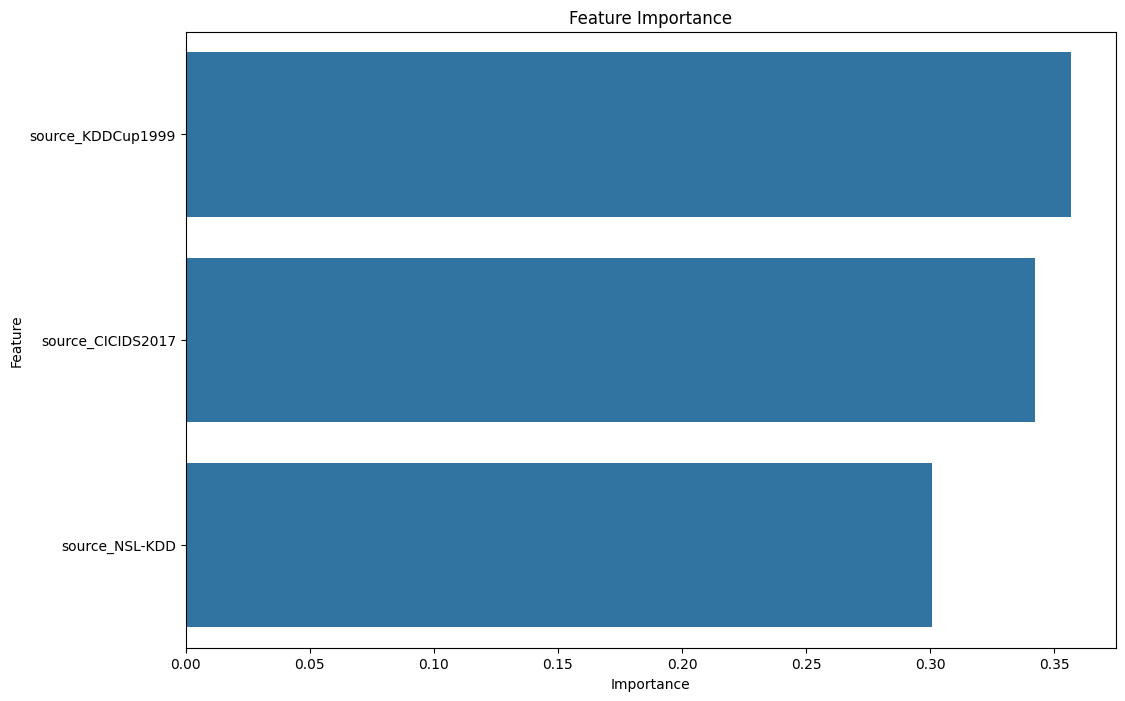

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, LeaveOneOut
from sklearn.exceptions import NotFittedError
import numpy as np

# Assuming X_train and y_train are already defined and preprocessed

# Define the model
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Check the number of samples per class
class_counts = y_train.value_counts()
print("Class distribution:")
print(class_counts)

# Determine a valid number of splits
min_class_count = class_counts.min()
num_splits = max(2, min_class_count)  # Ensure splits are at least 2 but not more than the smallest class size

print(f"Using {num_splits} splits for cross-validation.")

# Define a cross-validation strategy
if num_splits > 2:
    cv_strategy = StratifiedKFold(n_splits=num_splits)
else:
    cv_strategy = LeaveOneOut()  # Fallback to LOOCV if too few samples

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
try:
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and best score
    print("Best Parameters:")
    print(grid_search.best_params_)
    print("\nBest Score:")
    print(grid_search.best_score_)

    # Use the best model from the grid search
    best_model = grid_search.best_estimator_

    # Get feature importances from the best model
    importances = best_model.feature_importances_

    # Ensure feature_names is defined and contains the feature names
    if isinstance(X_train, pd.DataFrame):
        feature_names = X_train.columns
    else:
        raise ValueError("X_train is not a DataFrame. Ensure X_train is properly defined.")

    # Create a DataFrame for feature importances
    features_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=features_df)
    plt.title('Feature Importance')
    plt.show()

except ValueError as e:
    print(f"ValueError occurred: {e}")
    print("Consider using different cross-validation techniques or adjusting the parameter grid.")
except NotFittedError as e:
    print(f"Model fitting error: {e}")
    print("The model might not be fitted properly. Check the data and model configuration.")


# Model Evaluation with Different Metrics

Consider evaluating your model using various metrics depending on your project's needs, such as precision, recall, F1-score, and ROC-AUC.



ValueError occurred: Only one class present in y_true. ROC AUC score is not defined in that case.
There might be issues with the input data or predictions. Check if y_test and X_test are properly defined.


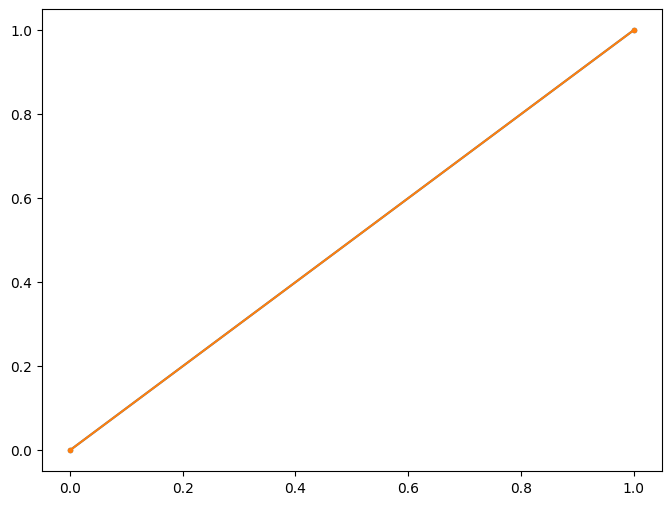

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.exceptions import NotFittedError
import matplotlib.pyplot as plt
import numpy as np

# Ensure you use the fitted model from GridSearchCV or another trained model
model = grid_search.best_estimator_  # Use the best model from GridSearchCV

# Check if the model has been fitted
try:
    # Get the predictions and probabilities
    y_proba = model.predict_proba(X_test)
    
    # Check the number of classes in y_test
    unique_classes = np.unique(y_test)
    num_classes = len(unique_classes)

    # Binary Classification
    if num_classes == 2:
        y_proba = y_proba[:, 1]  # Probabilities for the positive class
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"ROC-AUC Score: {roc_auc}")

        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, marker='.')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.show()

    # Multi-Class Classification
    else:
        # Calculate ROC-AUC for each class
        roc_auc_scores = []
        plt.figure(figsize=(8, 6))
        for i in range(num_classes):
            y_true_binary = (y_test == i).astype(int)
            y_score = y_proba[:, i]
            roc_auc = roc_auc_score(y_true_binary, y_score)
            roc_auc_scores.append(roc_auc)
            fpr, tpr, _ = roc_curve(y_true_binary, y_score)
            plt.plot(fpr, tpr, marker='.', label=f'Class {i} (ROC-AUC: {roc_auc:.2f})')

        print(f"ROC-AUC Scores by class: {roc_auc_scores}")

        # Plot ROC Curve
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

except NotFittedError as e:
    print(f"Error: {e}")
    print("The model is not fitted yet. Ensure you call fit() with appropriate arguments before making predictions.")

except ValueError as e:
    print(f"ValueError occurred: {e}")
    print("There might be issues with the input data or predictions. Check if y_test and X_test are properly defined.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")
    print("Check your model training and prediction code for any issues.")


# 11. Save the Enhanced Model

Save the tuned model and any additional artifacts.



In [12]:
# Save the tuned model
import joblib

# Save the best model from GridSearchCV
try:
    # Ensure the directory exists
    import os
    os.makedirs('models', exist_ok=True)

    # Save the model
    joblib.dump(grid_search.best_estimator_, 'E:\\Hackatone Project\\NetTrafficGuard\\model\\tuned_random_forest_model.pkl')
    print("Model saved successfully to 'models/tuned_random_forest_model.pkl'.")
    joblib.dump(grid_search.best_estimator_, 'E:\\Hackatone Project\\NetTrafficGuard\\model\\random_forest_model.pkl')
    print("Model saved successfully to 'models/random_forest_model.pkl'.")

except Exception as e:
    print(f"An error occurred while saving the model: {e}")


Model saved successfully to 'models/tuned_random_forest_model.pkl'.
Model saved successfully to 'models/random_forest_model.pkl'.




## Conclusion
In this notebook, we have:
- Loaded and combined datasets from KDDCup1999, NSL-KDD, and CICIDS2017.
- Performed data preprocessing including handling missing values and feature selection.
- Developed and evaluated a RandomForest model for network traffic analysis.
- Saved the trained model for future use.

The next steps could involve fine-tuning the model, exploring additional features, or integrating the model into the Flask application for real-time predictions.

